In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

In [12]:
from datetime import timedelta, datetime

import numpy as np
import yfinance as yf

from optfolio.optimize import Optimizer

In [41]:
PERIOD = '10y'
TICKERS = [
    # Internet services
    'msft',
    'goog',
    'fb',
#     'twtr',
#     'vmw',
#     'orcl',
#     'bidu',
    'spot',
    # Application software
    'shop',
    'adbe',
    'crm',
#     'wday',
#     'sap',
#     'sq',
#     'team',
    # Comm. equipment
#     'csco',
    # Semiconductors
    'intc',
    'amd',
    'txn',
#     'qcom',
    'nvda',
    # Misc
#     'dell',
    # Personal finance
    'v',
    'ma',
    'pypl',
    # Consumer directionary
    'aapl',
    'nke',
#     'sne',
    'amzn',
#     'ebay',
#     'baba',
    # Aerospace
#     'lmt',
#     'noc',
#     'ba',
    # Media
    'nflx',
    'dis',
    # Airlines
#     'dal',
#     'ual',
#     'luv',
    # Automotive
    'tsla'
]

data = yf.download(
    tickers=TICKERS,
    period=PERIOD,
    interval='1d',
    auto_adjust=True,
    prepost=False,
    groupby='ticker'
).dropna(axis=1, how='all')

daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]
daily_returns.head()

[*********************100%***********************]  20 of 20 downloaded


,AAPL,ADBE,AMD,AMZN,CRM,DIS,FB,GOOG,INTC,MA,MSFT,NFLX,NKE,NVDA,PYPL,SHOP,SPOT,TSLA,TXN,V
Date,,,,,,,,,,,,,,,,,,,,
2010-01-28,-0.041409,-0.007544,-0.037851,0.026721,-0.018960,0.000783,NaN,-0.014405,-0.016151,-0.026606,-0.017131,0.237637,-0.007576,-0.033268,NaN,NaN,NaN,NaN,-0.015334,-0.015038
2010-01-29,-0.036334,-0.017939,-0.053299,-0.004919,-0.009352,0.007042,NaN,-0.008153,-0.025992,0.001885,-0.033551,-0.013319,0.003393,-0.043860,NaN,NaN,NaN,NaN,-0.023915,-0.007634
2010-02-01,0.013825,0.005573,0.069705,-0.052149,0.025802,-0.001166,NaN,0.005796,0.010534,0.014111,0.008115,-0.019123,0.005917,0.076923,NaN,NaN,NaN,NaN,0.024501,0.020118
2010-02-02,0.006198,0.015394,-0.008772,-0.006309,-0.002454,0.015558,NaN,-0.003540,0.015288,-0.003711,0.001789,0.013761,-0.002521,0.010485,NaN,NaN,NaN,NaN,0.011123,0.004060
2010-02-03,0.016838,0.000000,-0.012642,0.008297,0.009225,0.025661,NaN,0.018256,-0.003422,-0.019553,0.005804,0.001131,0.000842,0.008431,NaN,NaN,NaN,NaN,-0.004400,-0.005777


In [42]:
spy_data = yf.download(tickers='SPY', period=PERIOD, interval='1d', auto_adjust=True, prepost=False)
spy_daily_returns = (spy_data['Close'] / spy_data['Close'].shift(1) - 1)[1:]
spy_daily_returns.head()

[*********************100%***********************]  1 of 1 downloaded


Date
2010-01-28   -0.011455
2010-01-29   -0.010800
2010-02-01    0.015467
2010-02-02    0.012095
2010-02-03   -0.004980
Name: Close, dtype: float64

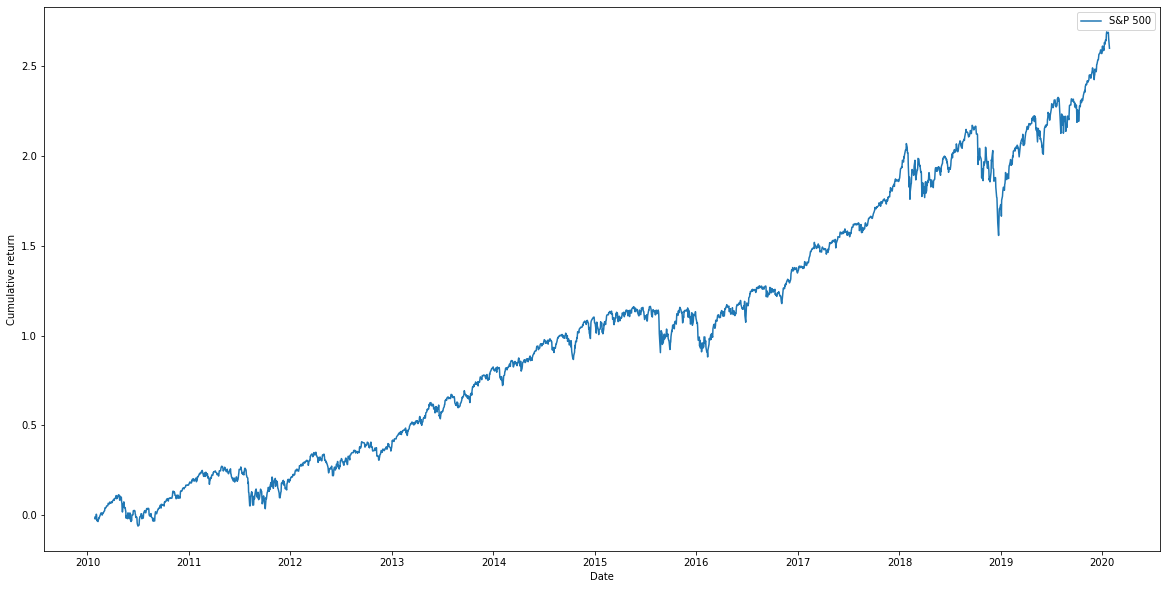

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumprod(spy_daily_returns + 1) - 1, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
plt.show()

In [44]:
YEAR_BARS = 252
TEST_YEARS = 0
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)
train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

spy_train = spy_daily_returns[(spy_daily_returns.index < TRAIN_END_DATE)].fillna(0)
spy_test = spy_daily_returns[(spy_daily_returns.index >= TRAIN_END_DATE)].fillna(0)

print(np.any(np.isnan(train)))
print(train.shape)
train.tail()

False
(2516, 20)


,AAPL,ADBE,AMD,AMZN,CRM,DIS,FB,GOOG,INTC,MA,MSFT,NFLX,NKE,NVDA,PYPL,SHOP,SPOT,TSLA,TXN,V
Date,,,,,,,,,,,,,,,,,,,,
2020-01-17,0.011071,0.012624,0.023307,-0.007040,-0.002518,-0.005444,0.001668,0.019763,-0.001006,0.010490,0.005597,0.003101,0.011222,0.001406,0.005546,0.007933,-0.023051,-0.005823,0.011832,0.018661
2020-01-21,-0.006777,0.000743,0.002356,0.014630,0.016682,-0.005335,-0.003151,0.002709,0.015940,-0.005345,-0.003591,-0.004593,0.000478,-0.005375,0.000948,0.023215,0.004112,0.071890,-0.006378,0.012653
2020-01-22,0.003570,0.000171,0.007444,-0.002400,-0.013602,0.003135,-0.000542,0.001044,0.036003,0.007393,-0.004805,-0.035817,-0.000861,0.008752,-0.005596,-0.001461,-0.005572,0.040863,0.018952,0.002943
2020-01-23,0.004816,0.004856,0.005444,-0.001526,0.006731,-0.012569,-0.007049,0.000471,0.009405,0.002066,0.006156,0.072393,-0.014068,0.010995,0.020693,0.009661,0.005739,0.004635,0.006825,-0.006638
2020-01-24,-0.002882,-0.001109,-0.026301,-0.012172,-0.010164,-0.014909,-0.008282,-0.013413,0.081333,-0.004031,-0.010077,0.010183,-0.009610,-0.009412,-0.007719,-0.008034,-0.015708,-0.012898,-0.027784,-0.007360


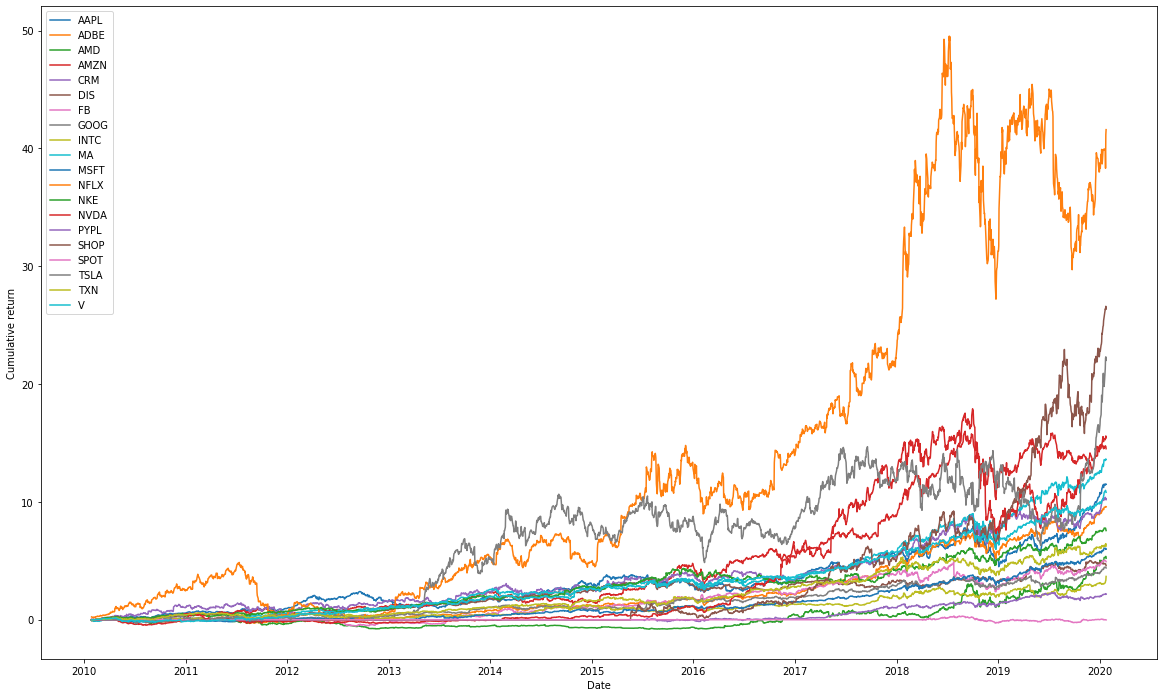

In [45]:
plt.figure(figsize=(20,12))
for col in train.columns:
    plt.plot(np.cumprod(train[col] + 1) - 1, label=col)

plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend(loc='upper left')
plt.show()

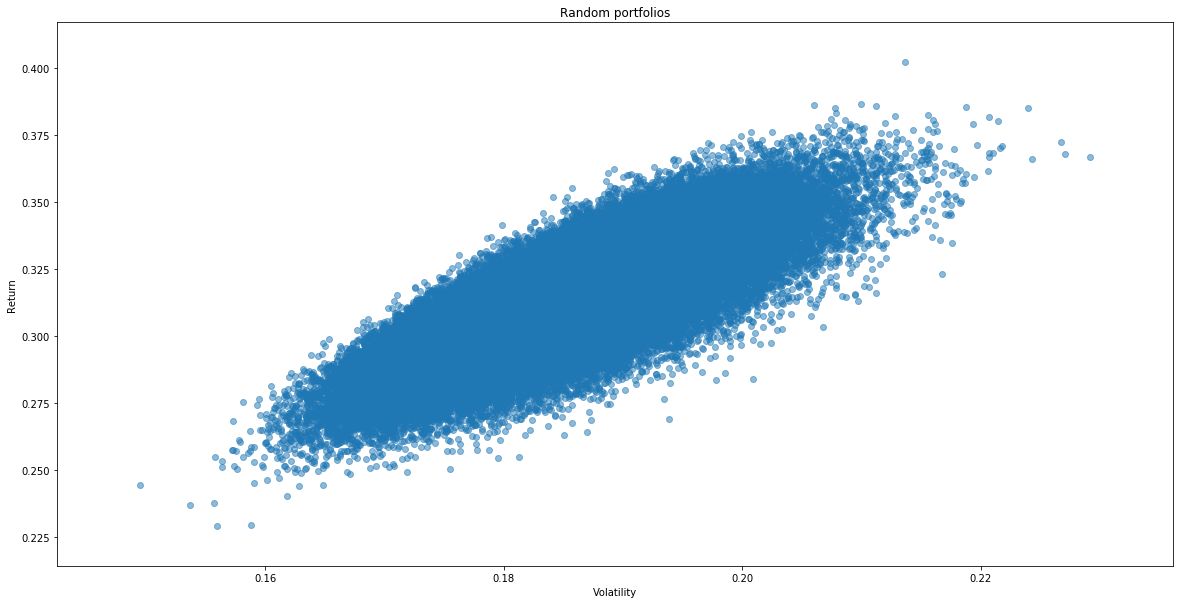

In [46]:
def random_population(n_assets, population_size):
    weights = np.random.uniform(0, 1, size=(population_size, n_assets))

    return weights / weights.sum(axis=-1).reshape((-1, 1))

def annualized_portfolio_return(returns, weights):
    weighted_returns = np.matmul(weights, np.mean(returns.values, 0))

    return (weighted_returns + 1) ** YEAR_BARS - 1


def annualized_portfolio_volatility(returns, weights):
    variance = np.sum(weights * np.matmul(weights, np.cov(returns.T.values)), -1)

    return np.sqrt(variance) * np.sqrt(YEAR_BARS)
    

def annualized_portfolio_performance(returns, weights):
    return np.stack([
        annualized_portfolio_return(returns, weights),
        annualized_portfolio_volatility(returns, weights)
    ], -1)

rand_weights = random_population(train.shape[1], 100000)
rand_solutions = annualized_portfolio_performance(train, rand_weights)

plt.figure(figsize=(20,10))
plt.title('Random portfolios')
plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [47]:
optimizer = Optimizer(mutation_sigma=1.0, verbose=False, max_iter=250, population_size=5000)
solutions, stats = optimizer.run(train.values)

In [48]:
solutions.shape

(748, 20)

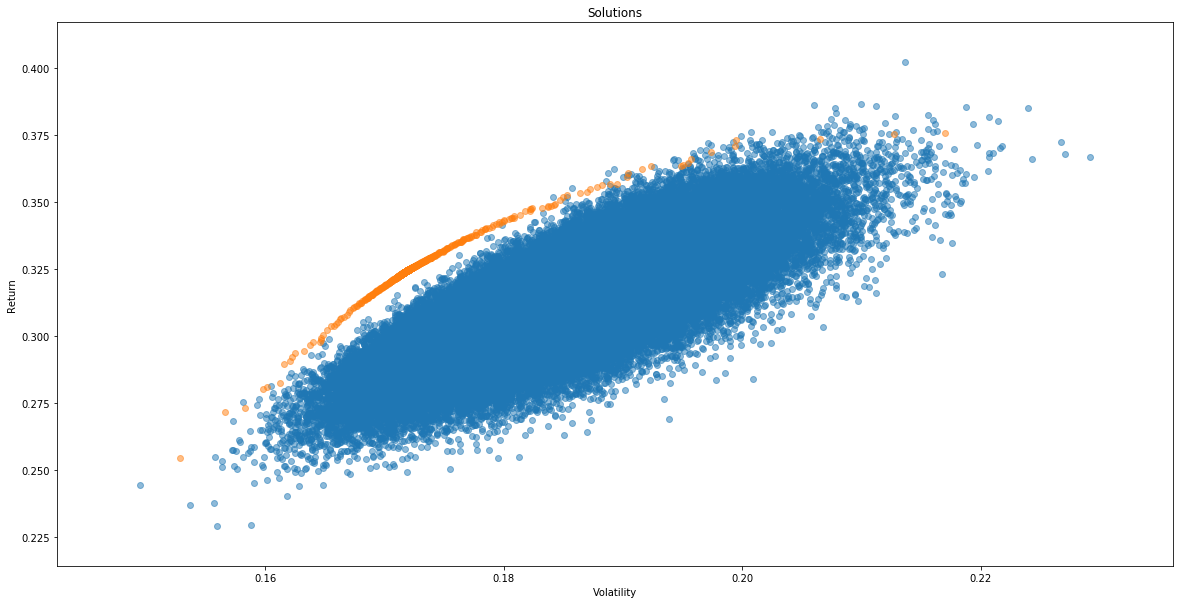

In [49]:
def plot_solutions(data, solutions, rand_solutions):
    ov = annualized_portfolio_performance(data, solutions)
    plt.figure(figsize=(20,10))
    plt.title('Solutions')
    plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
    plt.scatter(ov[:,1], ov[:,0], alpha=.5)
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.show()
    
plot_solutions(train, solutions, rand_solutions)

In [56]:
ov = annualized_portfolio_performance(train, solutions)
sharpe = ov[:,0] / ov[:,1]
solution = solutions[np.argmax(ov[:,0] / ov[:,1])]
# solution = solutions[np.argmin(np.abs(ov[:,1] - 0.16))]
annualized_portfolio_performance(train, solution)

array([0.34663937, 0.18174295])

In [64]:
CAPITAL = 38000

def print_allocation(data, allocations, prices):
    for ticker_id in np.argsort(-allocations):
        print('%s - %.4f, $%.2f USD, %.2f shares' % (data.columns[ticker_id], allocations[ticker_id] * 100, CAPITAL * allocations[ticker_id], (CAPITAL * allocations[ticker_id]) / prices[data.columns[ticker_id]]))
        
print_allocation(train, solution, data['Close'].iloc[-1])

SHOP - 10.7106, $4070.02 USD, nan shares
NFLX - 8.6964, $3304.63 USD, 9.41 shares
TSLA - 7.5375, $2864.26 USD, 5.22 shares
NKE - 7.4698, $2838.51 USD, 28.82 shares
AAPL - 7.1940, $2733.72 USD, 8.85 shares
V - 6.7038, $2547.44 USD, 12.69 shares
DIS - 6.6182, $2514.93 USD, 18.48 shares
MA - 6.3399, $2409.16 USD, 7.64 shares
PYPL - 6.0358, $2293.60 USD, 20.21 shares
FB - 5.2176, $1982.70 USD, 9.25 shares
TXN - 4.8971, $1860.90 USD, 14.50 shares
AMZN - 4.6016, $1748.61 USD, 0.96 shares
MSFT - 3.3017, $1254.65 USD, 7.77 shares
GOOG - 3.1580, $1200.02 USD, 0.84 shares
INTC - 3.0576, $1161.91 USD, 17.31 shares
ADBE - 2.8164, $1070.24 USD, 3.11 shares
NVDA - 2.0335, $772.72 USD, 3.24 shares
CRM - 1.8284, $694.79 USD, 3.88 shares
SPOT - 1.0471, $397.89 USD, 2.79 shares
AMD - 0.7354, $279.44 USD, 5.73 shares


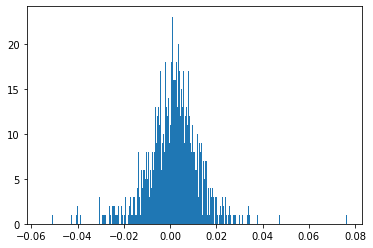

In [58]:
ret = np.dot(train, solution)
plt.hist(ret, bins=1000)
plt.show()

In [59]:
from optfolio.returns_projection import cumulative_n_period_returns, sample_returns, mcmc_sample_returns
from optfolio.report import plot_traces, returns_table

### S&P 500 MC Projection

In [60]:
spy_traces = sample_returns(spy_train, 10 * 252, n_traces=100000)

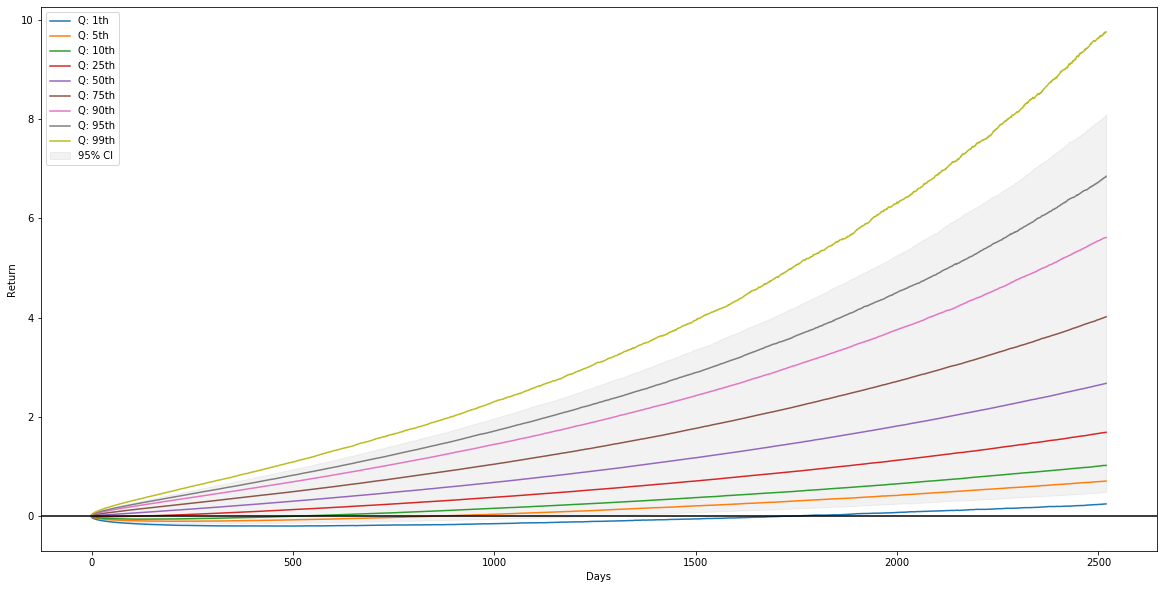

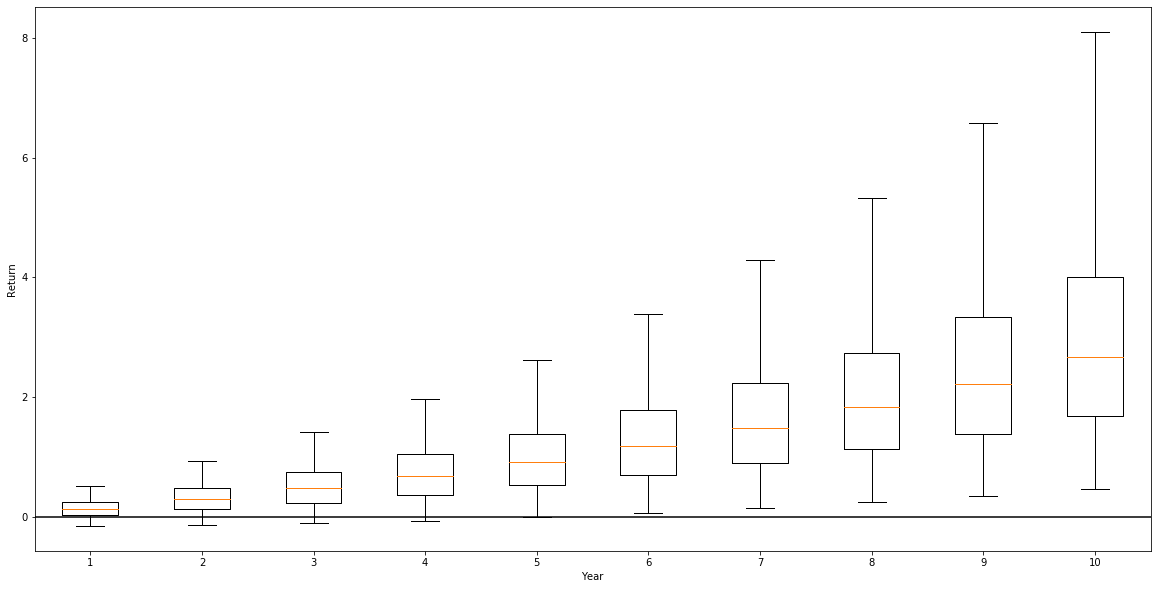

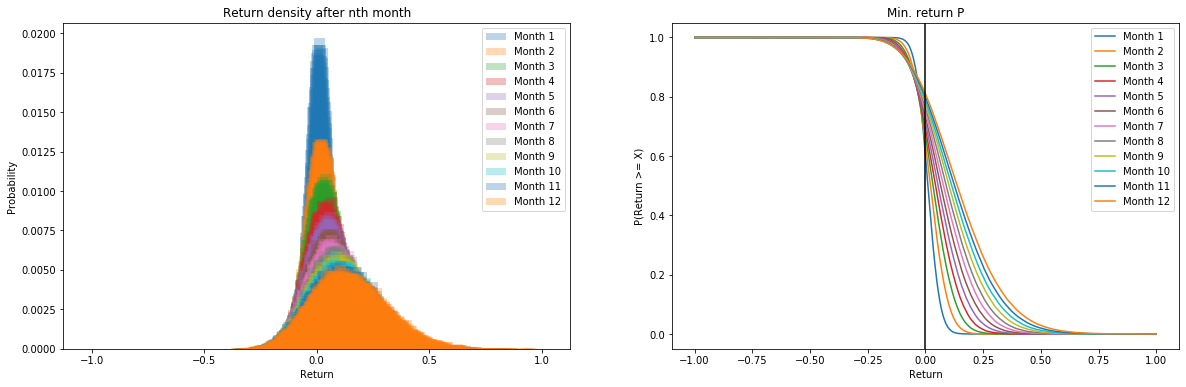

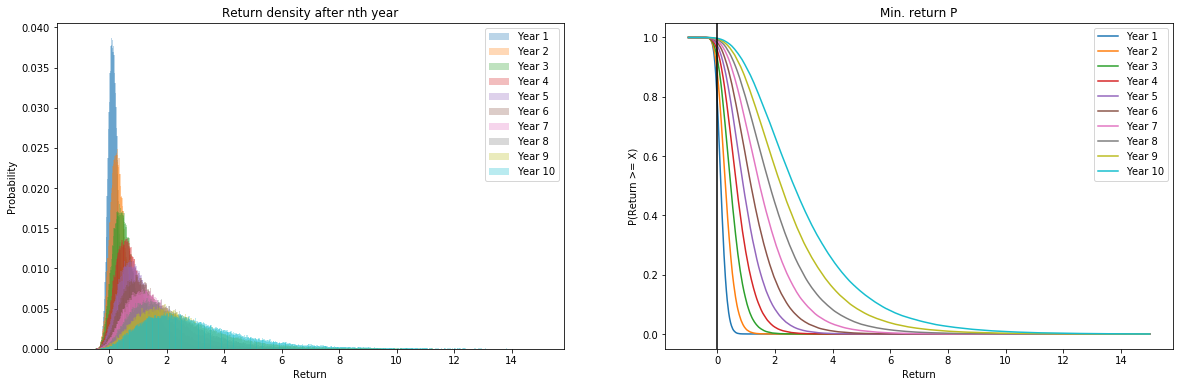

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,18.817,81.183,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,10.572,89.428,1.777,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,6.378,93.622,11.806,0.250,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,3.961,96.039,27.775,2.353,0.150,0.015,0.001,0.000,0.000,0.000,0.000,0.000
5,2.461,97.539,44.844,8.580,1.191,0.157,0.022,0.006,0.002,0.000,0.000,0.000
6,1.540,98.460,59.700,18.766,4.432,0.988,0.232,0.052,0.017,0.006,0.003,0.001
7,0.994,99.006,71.159,31.511,10.903,3.455,1.136,0.374,0.137,0.045,0.018,0.009
8,0.625,99.375,79.668,44.541,20.186,8.323,3.303,1.402,0.591,0.257,0.116,0.047
9,0.431,99.569,85.948,56.550,31.122,15.845,7.693,3.793,1.874,0.969,0.501,0.279


In [61]:
spy_cum_returns = plot_traces(spy_traces)
returns_table(spy_cum_returns)

### MC Projection

In [62]:
traces = sample_returns(ret, 10 * 252, n_traces = 100000)

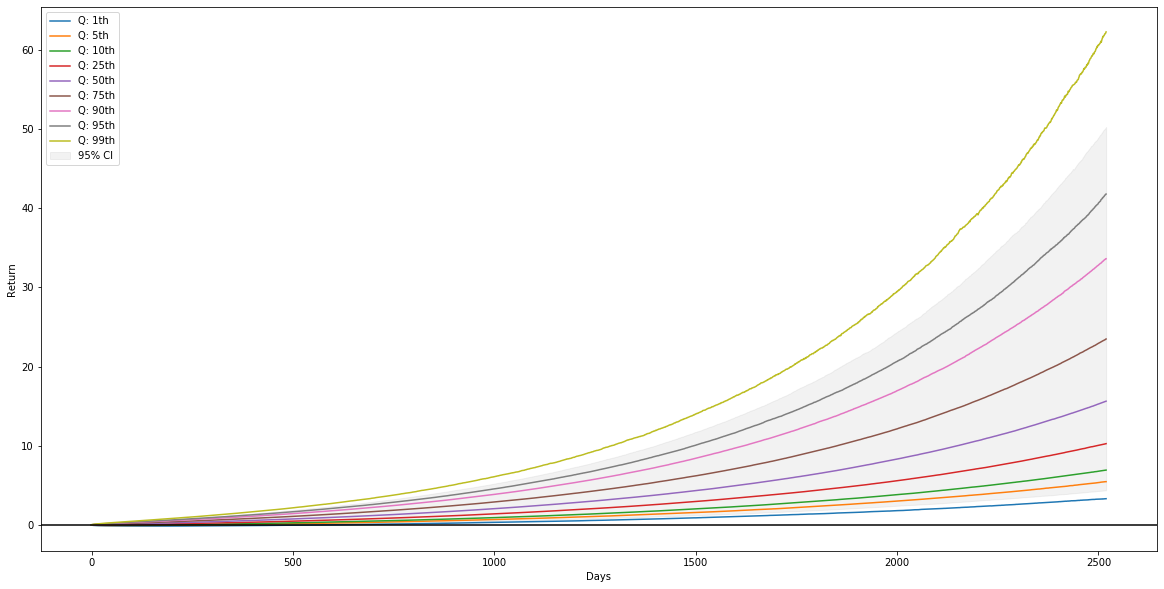

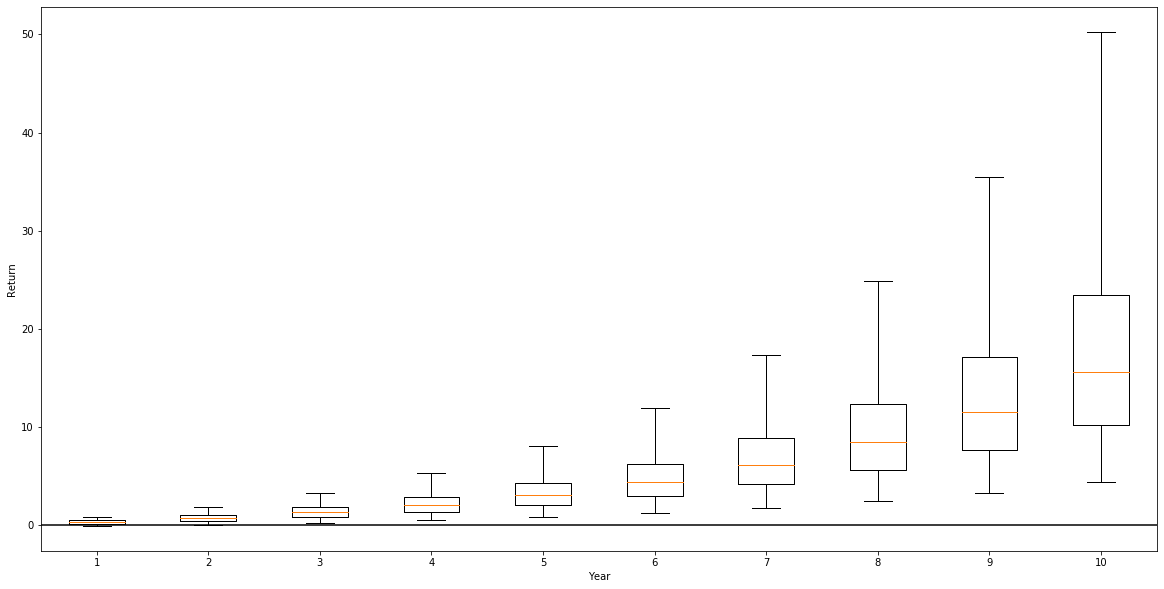

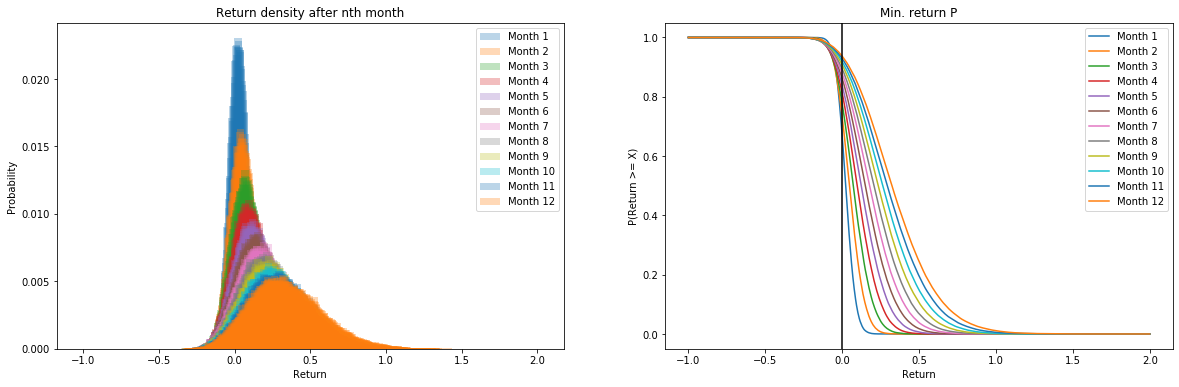

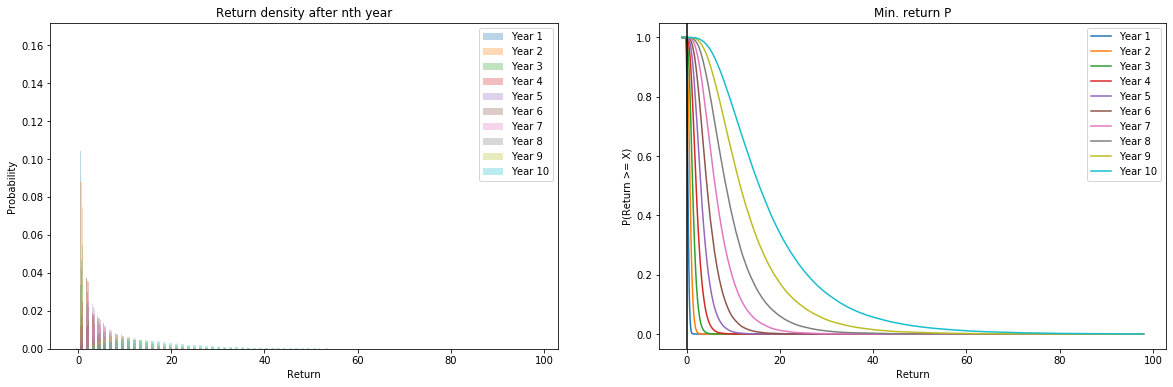

,< 0,> 0,>= 1,>= 2,>= 3,>= 4,>= 5,>= 6,>= 7,>= 8,>= 9,>= 10
Year,,,,,,,,,,,,
1,6.187,93.813,1.099,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.461,98.539,30.464,1.795,0.055,0.002,0.000,0.000,0.000,0.000,0.000,0.000
3,0.416,99.584,68.350,20.736,4.141,0.700,0.137,0.015,0.000,0.000,0.000,0.000
4,0.096,99.904,88.175,52.604,23.319,9.043,3.325,1.190,0.418,0.164,0.064,0.031
5,0.031,99.969,95.916,77.314,51.709,30.692,17.117,9.101,4.838,2.557,1.356,0.722
6,0.007,99.993,98.669,90.579,74.869,56.768,40.440,27.990,18.934,12.637,8.338,5.499
7,0.004,99.996,99.582,96.361,88.558,77.083,64.250,51.683,40.744,31.574,24.306,18.576
8,0.000,100.000,99.851,98.661,95.274,89.167,81.137,72.024,62.721,53.875,45.888,38.547
9,0.000,100.000,99.961,99.549,98.162,95.392,91.172,85.640,79.403,72.771,65.972,59.412


In [63]:
cum_returns = plot_traces(traces)
returns_table(cum_returns)

In [170]:
mcmc_traces = mcmc_sample_returns(ret, 5 * 252, n_traces=100000, mc_states = 10, n_jobs=10)

Process ForkPoolWorker-31:
Process ForkPoolWorker-34:
Process ForkPoolWorker-33:
Process ForkPoolWorker-36:
Process ForkPoolWorker-32:
Process ForkPoolWorker-37:
Process ForkPoolWorker-38:
Process ForkPoolWorker-40:
Process ForkPoolWorker-35:
Process ForkPoolWorker-39:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.6.5_1/Frameworks/

In [171]:
mcmc_cum_returns = plot_traces(mcmc_traces)
returns_table(mcmc_cum_returns)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'